# **데이터 분석**

이혼 종류별 데이터와, 이혼 사유별 데이터를 통하여
데이터의 전처리(가공) 과정부터 분석, 그리고 시각화하는 기술을 습득한다.



## **목차**
- ***1. 종류별 이혼건수 데이터 가공/분석/시각화***
- 종류별 이혼건수 데이터 전처리
- 이혼 종류 상위 분석
- 분석한 데이터 시각화
- 2000년대, 2010년대 이후 종류별 백분율
- 2000년대, 2010년대 이후 종류별 비교 시각화
-----
- ***2. 사유별 이혼건수 데이터 예측/가공/분석/시각화***
- 기존 데이터의 한계
- 2018~2023년 데이터 예측
- 각 사유의 비율 분석
- 2000년대, 2010년대 이후 사유별 백분율
- 2000년대, 2010년대 이후 사유별 비교 시각화
------
- ***3. 두 가지 데이터 비교 및 결론***


# **<1> 종류별 이혼건수 데이터 가공/분석/시각화**

가장 먼저 종류별 이혼건수 데이터를 불러와 헤드를 확인해봅니다.

In [31]:
import pandas as pd

file_path = '/content/종류별_이혼건수.csv'
df = pd.read_csv(file_path)
print(df.head())

     시점     소계   합의이혼  재판이혼   미상
0  2000  25477  21515  3794  168
1  2001  28962  23914  4791  257
2  2002  29351  24670  4504  177
3  2003  32499  28193  4054  252
4  2004  26994  22780  4025  189


데이터는 시점, 소계, 합의이혼, 재판이혼, 미상으로 확인됩니다.

합의이혼, 재판이혼, 미상, 소계의 데이터를 정수형으로 전처리 해줍니다.
이는 통계 및 분석을 위한 전처리입니다.

In [32]:
# 정수형으로 변환
columns_to_convert = ['시점','합의이혼', '재판이혼', '미상']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

# 변환 결과 확인
print(df.dtypes)
print(df.head())

시점        int16
소계        int64
합의이혼      int16
재판이혼      int16
미상      float64
dtype: object
     시점     소계   합의이혼  재판이혼     미상
0  2000  25477  21515  3794  168.0
1  2001  28962  23914  4791  257.0
2  2002  29351  24670  4504  177.0
3  2003  32499  28193  4054  252.0
4  2004  26994  22780  4025  189.0


종류별 이혼건수에서 2001~2023년 사이 가장 많은 이혼 종류는 무엇이었는지 알아봅니다.

한글로 하면 자꾸 깨져서 영어로 이름을 mapping 시켰습니다.

In [33]:
import warnings
warnings.filterwarnings("ignore")  # 모든 경고 메시지 숨김

# 데이터 로드
file_path = '/content/종류별_이혼건수.csv'
divorce_types = pd.read_csv(file_path)

# 데이터 전처리: 열 이름 수정 및 연도 열의 이름을 Year로 변경
divorce_types.rename(columns={divorce_types.columns[0]: 'Year'}, inplace=True)

# 영어로 컬럼 이름 변경
column_mapping = {
    '소계': 'Total',
    '합의이혼': 'Mutual',
    '재판이혼': 'Litigation',
    '미상': 'Unknown'
}
divorce_types.rename(columns=column_mapping, inplace=True)

In [34]:
# 2001~2023년 사이 가장 많은 이혼 종류 찾기 (Total, Unknown 제외)
filtered_columns = ['Mutual', 'Litigation']
most_divorced_type = divorce_types[filtered_columns].sum().idxmax()
most_divorced_count = divorce_types[most_divorced_type].sum()

# 결과 출력
print(f"2001년부터 2023년까지 가장 많은 이혼 종류는 '{most_divorced_type}'이며, 총 {most_divorced_count}건입니다.")

2001년부터 2023년까지 가장 많은 이혼 종류는 'Mutual'이며, 총 408432건입니다.


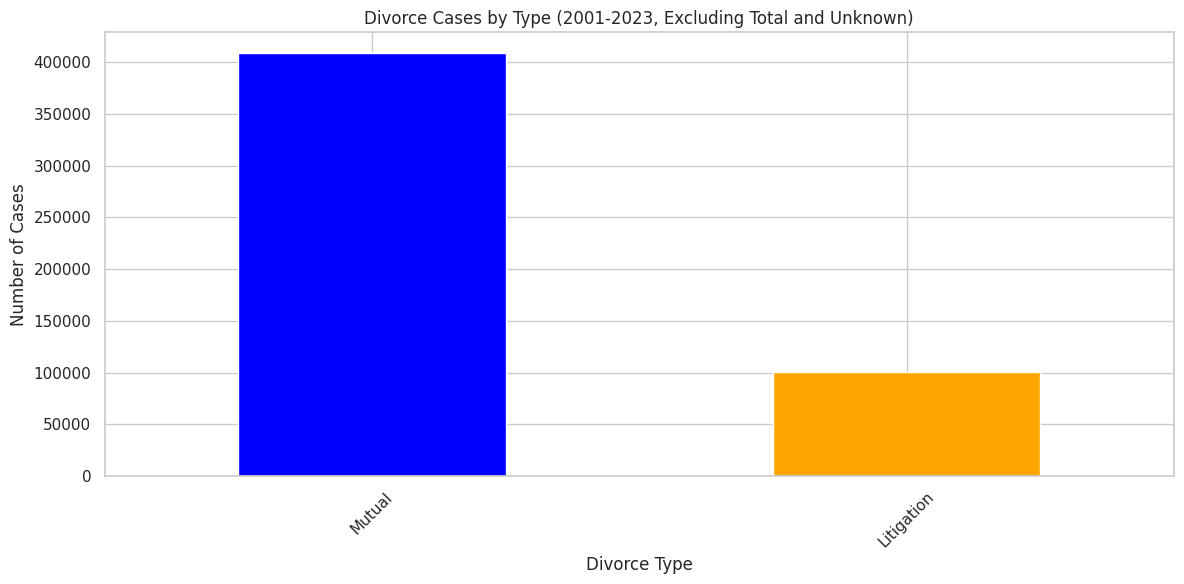

In [35]:

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Total과 Unknown 제외한 Mutual과 Litigation만 그래프에 표시
plt.figure()
divorce_types.set_index('Year')[filtered_columns].sum().plot(kind='bar', color=['blue', 'orange'])
plt.title('Divorce Cases by Type (2001-2023, Excluding Total and Unknown)')
plt.ylabel('Number of Cases')
plt.xlabel('Divorce Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


이제 각 해에 이혼 종류별 백분율이 얼마나 차지하는지를 분석합니다.

In [36]:

divorce_types = divorce_types.drop(columns=['Total', 'Unknown'], errors='ignore')

# 각 해의 총 이혼 건수 대비 각 종류의 비율(%) 계산
divorce_types['Total_Count'] = divorce_types.sum(axis=1)
for col in divorce_types.columns[1:-1]:
    divorce_types[col + '_Percent'] = (divorce_types[col] / divorce_types['Total_Count'] * 100).round(2)

print("비율 계산 완료!")
print(divorce_types.head())

비율 계산 완료!
   Year  Mutual  Litigation  Total_Count  Mutual_Percent  Litigation_Percent
0  2000   21515        3794        27309           78.78               13.89
1  2001   23914        4791        30706           77.88               15.60
2  2002   24670        4504        31176           79.13               14.45
3  2003   28193        4054        34250           82.32               11.84
4  2004   22780        4025        28809           79.07               13.97


이를 그래프로 시각화합니다.

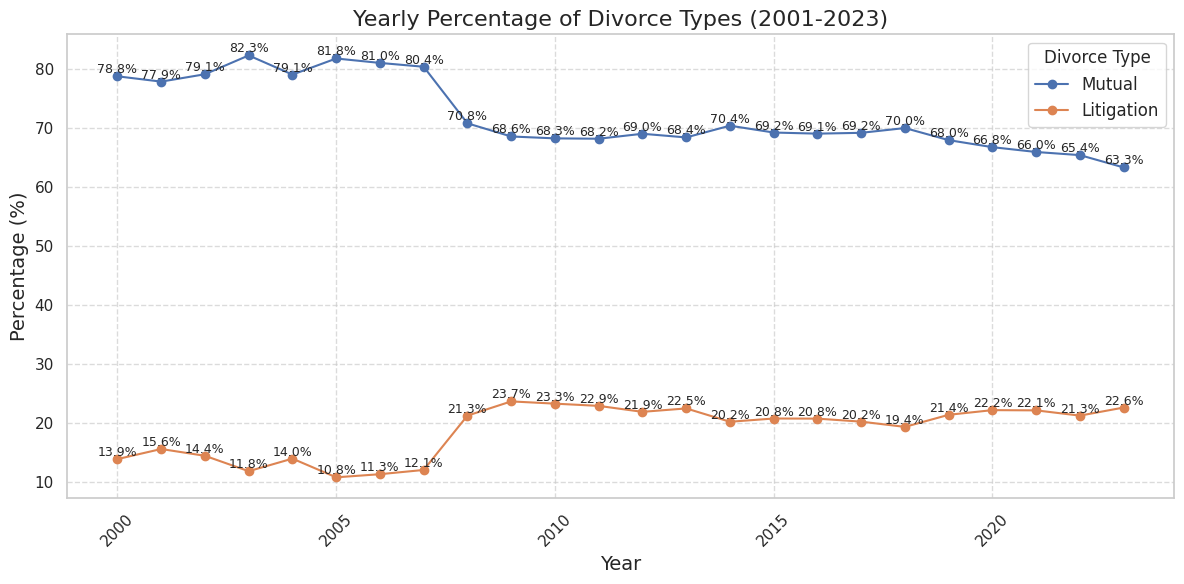

In [38]:

# 시각화: 연도별 각 이혼 종류의 비율 변화
plt.figure()
for col in ['Mutual_Percent', 'Litigation_Percent']:
    plt.plot(divorce_types['Year'], divorce_types[col], marker='o', label=col.split('_')[0])  # _Percent 제거

    # 각 포인트에 텍스트 표시
    for x, y in zip(divorce_types['Year'], divorce_types[col]):
        plt.text(x, y, f'{y:.1f}%', fontsize=9, ha='center', va='bottom')

# 그래프 제목 및 축 설정
plt.title('Yearly Percentage of Divorce Types (2001-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Divorce Type', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()

뭔가 그래프의 추이가 변화하는 것을 확인할 수 있었습니다. <br>
그렇다면 이를 좀더 눈에 보이기 좋게 하기 위해 원형 그래프로 평균을 내서 확인해보겠습니다.

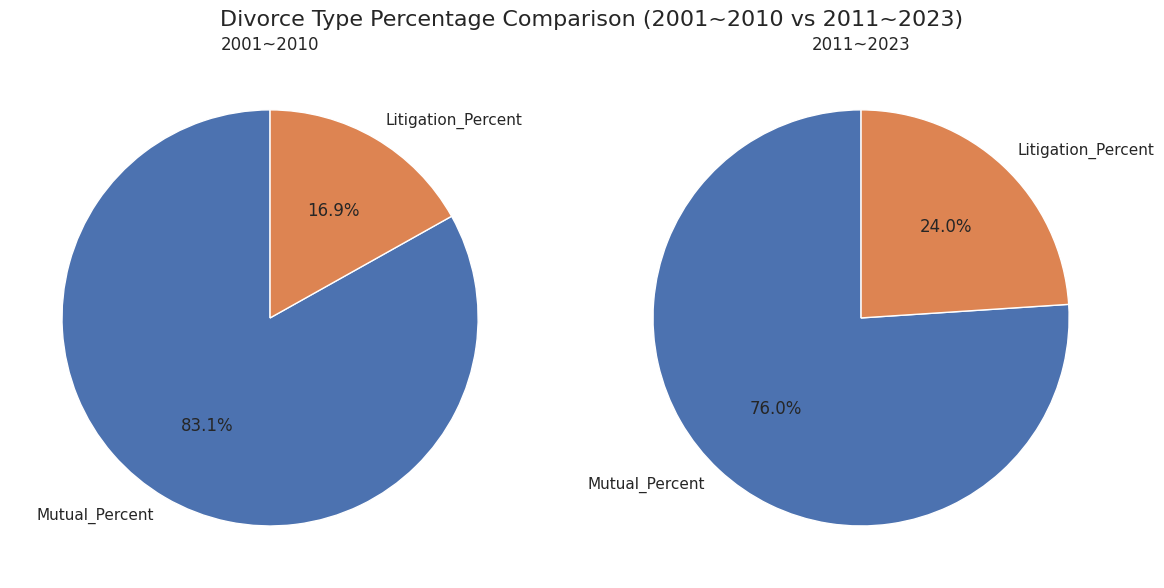

In [40]:
# 2001~2010년 및 2011~2023년 백분율 평균 계산
average_before_2010 = divorce_types[divorce_types['Year'] <= 2010][['Mutual_Percent', 'Litigation_Percent']].mean()
average_after_2010 = divorce_types[divorce_types['Year'] > 2010][['Mutual_Percent', 'Litigation_Percent']].mean()

# 원형 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 2001~2010 원형 그래프
axes[0].pie(average_before_2010, labels=average_before_2010.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('2001~2010')

# 2011~2023 원형 그래프
axes[1].pie(average_after_2010, labels=average_after_2010.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('2011~2023')

plt.suptitle('Divorce Type Percentage Comparison (2001~2010 vs 2011~2023)', fontsize=16)
plt.tight_layout()
plt.show()


2000년대의 평균 백분율과, 2010년 이후의 평균 백분율입니다.<br>
이를 통해 기존보다 합의 이혼은 하락 추세를 보이고 있으나, **재판 이혼이 늘어나는 것**을 알 수 있었습니다.<br>
그렇다면, **어떤 사유로 이혼을 하는지에 대한 데이터를 분석함으로서, 어느정도 상관관계를 유추**해볼 수 있지 않을까요?

# **<2> 사유별 이혼건수 데이터 예측/가공/분석/시각화**

In [86]:
file_path = '/content/사유별_이혼건수.csv'
df = pd.read_csv(file_path)
df.head()

,이혼사유별(2),2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,소계,28962,29351,32499,26994,25300,24354,24615,23319,23920,21768,20617,20177,20126,19477,18176,17777,17083
1,배우자 부정,2225,2609,2291,1770,1888,1798,1762,1630,1888,1689,1610,1438,1416,1223,1142,1164,1082
2,정신적육체적 학대,1120,1251,1234,1025,955,965,959,993,1190,972,883,765,697,668,600,578,487
3,가족간 불화,5420,4468,4679,3374,3011,2384,1869,1715,1609,1444,1344,1136,1121,1101,1362,1410,1071
4,경제문제,3459,4096,5423,4318,4091,3965,3431,3241,3468,2671,2646,2779,2551,2178,2018,1931,1818


변수가 발생했습니다..<br>
2017년까지의 데이터만 존재하고 있었습니다.
이 때 두가지를 생각해볼 수 있었습니다.<br><br>
**1. 회귀 예측을 통해 2018~2023년까지의 데이터를 예측**<br>
**2. 파이썬 비율 예측을 통해 예측**

1번인 회귀 예측을 통해 진행했더니, 불화와 학대 쪽 섹션이 음수가 나타났습니다.<br>
아무래도 회귀예측의 특성상 하향 그래프는 쭉 하향 그래프를 그리며 예측하게 되는데,<br> 하향률에 따르면 음수로 가게되고, 음수로 가지 못하게 하더라도 0이 되었습니다.

물론 저의 세팅 에러일 수 있으나,, <br>조금 더 간편한 방법인 비율 예측으로 진행하게 되었습니다.

-----

우선 종류별 이혼건수 데이터와 형식을 맞추기 위해 전치과정을 진행했습니다.<br> 연도 데이터를 열이 아닌 행으로 이동했습니다.

In [87]:
# 데이터 전처리: 연도와 각 사유별 데이터를 사용하도록 정리
df = df.rename(columns={df.columns[0]: 'index'})  # 첫 번째 열 이름 변경
df = df.set_index('index').transpose()  # 데이터 전치
df = df.reset_index().rename(columns={'index': 'Year'})  # 연도로 이름 변경!
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # 숫자가 아닌 값(NaN) 제거
df = df.dropna().astype({'Year': 'int'})  # NaN 제거 후 정수형으로 변환


# 기존 데이터 출력
print("전치 Data:")
print(df)

전치 Data:
index  Year     소계  배우자 부정  정신적육체적 학대  가족간 불화  경제문제   성격차이  건강문제    기타    미상
0      2001  28962    2225       1120    5420  3459  12355   174  3731   478
1      2002  29351    2609       1251    4468  4096  12535   158  3780   454
2      2003  32499    2291       1234    4679  5423  13489   172  4773   438
3      2004  26994    1770       1025    3374  4318  11943   150  3895   519
4      2005  25300    1888        955    3011  4091  11365   153  3278   559
5      2006  24354    1798        965    2384  3965  11689   158  2936   459
6      2007  24615    1762        959    1869  3431  11626   164  3882   922
7      2008  23319    1630        993    1715  3241  11501   109  3718   412
8      2009  23920    1888       1190    1609  3468  11070   118  4181   396
9      2010  21768    1689        972    1444  2671   9694   127  4776   395
10     2011  20617    1610        883    1344  2646   9064   124  4491   455
11     2012  20177    1438        765    1136  2779   9790    99  3

2023년까지의 실제 이혼 건수 데이터를 가져와 사유별 이혼건수의 2023년까지 <br>
데이터를 예측할 때 사용합니다.

In [88]:
# 실제 2023년까지의 이혼 건수를 담은 데이터 로드
actual_file_path = '/content/2023년_실제_이혼건수.csv'
actual_data = pd.read_csv(actual_file_path)
actual_data

,시점,이혼건수 (건)
0,2001,28962
1,2002,29351
2,2003,32499
3,2004,26994
4,2005,25300
5,2006,24354
6,2007,24615
7,2008,23319
8,2009,23920
9,2010,21768


실제 2018~2023년 까지의 총 이혼건수를 바탕으로
예측 데이터를 저장할 prediceted_actual을 생성합니다.

In [89]:
# 실제 총 이혼 건수 데이터 준비
actual_data = actual_data.rename(columns={'시점': 'Year', '이혼건수 (건)': 'Total'})
actual_data = actual_data.set_index('Year')  # Year를 인덱스로 설정

# 기존 데이터에서 사유별 건수 데이터만 가져오기
df['Total'] = df['소계']  # 총 이혼 건수 ('소계') 열 복사

# 새로운 데이터프레임 생성: 기존 데이터 + 예측 데이터
predicted_actual = df.copy()
predicted_actual

index,Year,소계,배우자 부정,정신적육체적 학대,가족간 불화,경제문제,성격차이,건강문제,기타,미상,Total
0,2001,28962,2225,1120,5420,3459,12355,174,3731,478,28962
1,2002,29351,2609,1251,4468,4096,12535,158,3780,454,29351
2,2003,32499,2291,1234,4679,5423,13489,172,4773,438,32499
3,2004,26994,1770,1025,3374,4318,11943,150,3895,519,26994
4,2005,25300,1888,955,3011,4091,11365,153,3278,559,25300
5,2006,24354,1798,965,2384,3965,11689,158,2936,459,24354
6,2007,24615,1762,959,1869,3431,11626,164,3882,922,24615
7,2008,23319,1630,993,1715,3241,11501,109,3718,412,23319
8,2009,23920,1888,1190,1609,3468,11070,118,4181,396,23920
9,2010,21768,1689,972,1444,2671,9694,127,4776,395,21768


아래는 2017년의 데이터를 바탕으로 2018~2023년까지의 각 해 총 이혼건수를 <br>
비율 계산하여 예측한 값을 구하는 코드입니다.

In [90]:
for year in range(2018, 2024):
    # 실제 총 이혼 건수를 가져오기
    total_cases = actual_data.loc[year, 'Total'] if year in actual_data.index else None
    if total_cases is not None:
        # 새로운 행을 추가
        new_row = {'Year': year, '소계': total_cases}
        for column in df.columns[2:]:
            # 마지막 연도(2017년)의 비율을 기준으로 예측
            new_row[column] = (total_cases * df[column].iloc[-1] / df['Total'].iloc[-1]).round().astype(int)
        predicted_actual = pd.concat([predicted_actual, pd.DataFrame([new_row])], ignore_index=True)

# 불필요한 열 제거
predicted_actual = predicted_actual.drop(columns=['Total'], errors='ignore')

print(predicted_actual)

# CSV로 저장 (정수형 데이터로 저장)
predicted_actual.to_csv('/content/2023년_사유별_이혼건수_최종.csv', index=False, encoding='utf-8-sig')


    Year     소계  배우자 부정  정신적육체적 학대  가족간 불화  경제문제   성격차이  건강문제    기타    미상
0   2001  28962    2225       1120    5420  3459  12355   174  3731   478
1   2002  29351    2609       1251    4468  4096  12535   158  3780   454
2   2003  32499    2291       1234    4679  5423  13489   172  4773   438
3   2004  26994    1770       1025    3374  4318  11943   150  3895   519
4   2005  25300    1888        955    3011  4091  11365   153  3278   559
5   2006  24354    1798        965    2384  3965  11689   158  2936   459
6   2007  24615    1762        959    1869  3431  11626   164  3882   922
7   2008  23319    1630        993    1715  3241  11501   109  3718   412
8   2009  23920    1888       1190    1609  3468  11070   118  4181   396
9   2010  21768    1689        972    1444  2671   9694   127  4776   395
10  2011  20617    1610        883    1344  2646   9064   124  4491   455
11  2012  20177    1438        765    1136  2779   9790    99  3829   341
12  2013  20126    1416        697    

2001~2023년까지의 각 해의 총 이혼건수에 비례해서 <br>각 사유가 얼마만큼의 비중을 차지하는지 백분율로 계산합니다.

각 항목은 한글로 표시할 경우 깨지는 이슈가 있어 영어로 변환하였습니다.

<Figure size 1000x600 with 0 Axes>

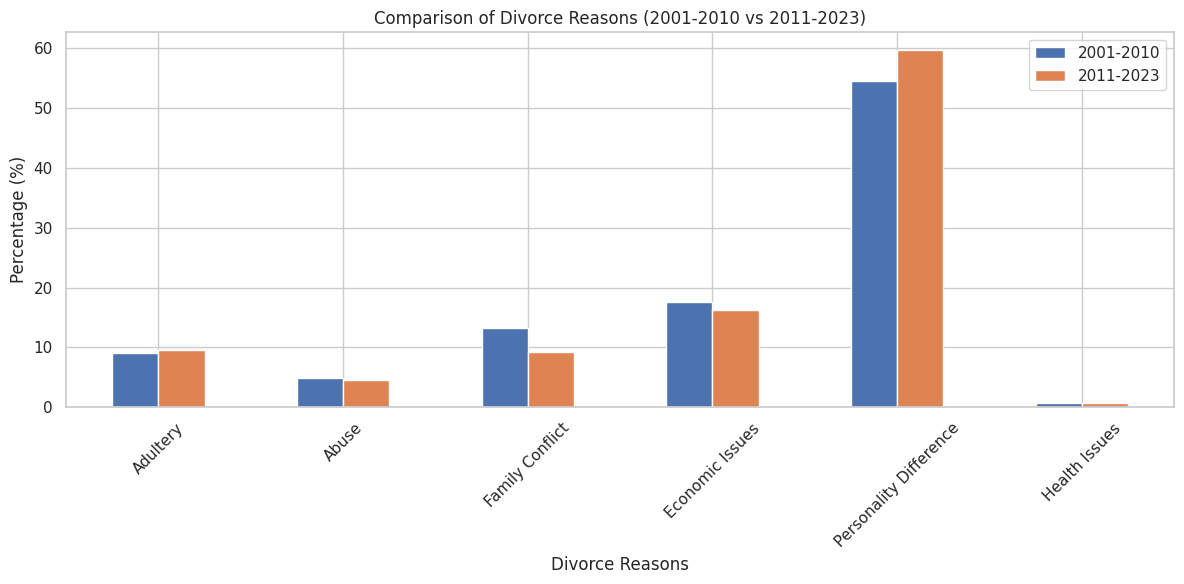

In [95]:
file_path = '/content/2023년_사유별_이혼건수_최종.csv'
data = pd.read_csv(file_path)

# 한글 깨짐 이슈로 영어로 변경
data.rename(columns={
    '소계': 'Total',
    '배우자 부정': 'Adultery',
    '정신적육체적 학대': 'Abuse',
    '가족간 불화': 'Family Conflict',
    '경제문제': 'Economic Issues',
    '성격차이': 'Personality Difference',
    '건강문제': 'Health Issues',
    '기타': 'Others',
    '미상': 'Unknown'
}, inplace=True)

# 'Total', 'Others', 'Unknown' 열 제거
data = data.drop(columns=['Total', 'Others', 'Unknown'], errors='ignore')

# 각 해의 총 이혼 건수 대비 백분율 계산
data_percentage = data.copy()
data_percentage.iloc[:, 1:] = data_percentage.iloc[:, 1:].div(data_percentage.iloc[:, 1:].sum(axis=1), axis=0) * 100

# 2001~2010년, 2011~2023년 데이터 나누기
data_2001_2010 = data_percentage[(data_percentage['Year'] >= 2001) & (data_percentage['Year'] <= 2010)]
data_2011_2023 = data_percentage[data_percentage['Year'] > 2010]

# 사유별 평균 백분율 계산
mean_2001_2010 = data_2001_2010.iloc[:, 1:].mean()
mean_2011_2023 = data_2011_2023.iloc[:, 1:].mean()

# 결과 데이터프레임 생성
comparison_df = pd.DataFrame({
    '2001-2010': mean_2001_2010,
    '2011-2023': mean_2011_2023
}).reset_index()
comparison_df.rename(columns={'index': 'Reason'}, inplace=True)

# 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
comparison_df.plot(x='Reason', kind='bar', figsize=(12, 6))
plt.title('Comparison of Divorce Reasons (2001-2010 vs 2011-2023)')
plt.ylabel('Percentage (%)')
plt.xlabel('Divorce Reasons')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()


**결과를 보니**<br>

***상승한 항목<br>***
배우자 부정 [Adultery] 는 상승<br>
성격차이[Personailty Difference]는 상승<br>

***하락한 항목<br>***
학대[Abuse]는 하락<br>
가정 불화[Family Confilct]는 하락<br>
금전적 문제[Economic Issues]는 하락<br>

건강문제는 비슷한것을 알 수 있었습니다.


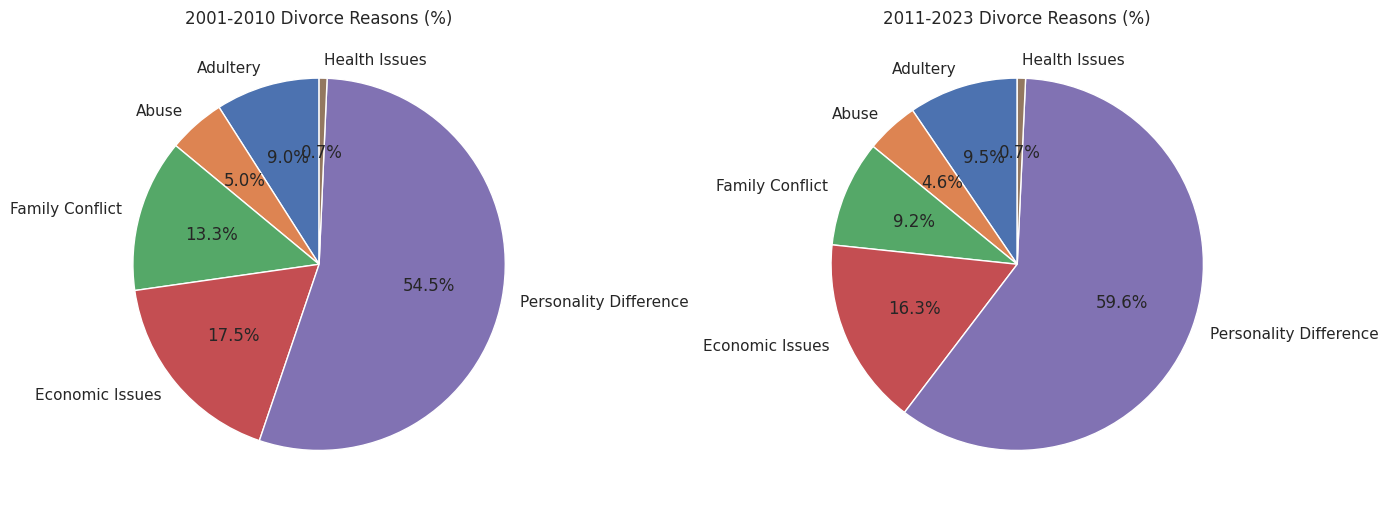

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 2001-2010 데이터
axes[0].pie(mean_2001_2010, labels=mean_2001_2010.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('2001-2010 Divorce Reasons (%)')

# 2011-2023 데이터
axes[1].pie(mean_2011_2023, labels=mean_2011_2023.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('2011-2023 Divorce Reasons (%)')

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

조금 더 보기 쉽게 원형그래프로 확인한 결과입니다.<br>
기타와 미상이 2000년대 보다 2010년대가 더 많은 것을 고려했을 때,<br>
이유를 밝히지 않거나, 상승한 요인을 바탕으로 <br>2000년도에 대비해 배우자의 부정으로 인한 이혼률은 높아지고, <br>금전적 문제와 가정불화로 인한 이혼률은 하락한 것을 유추할 수 있습니다.

# **결론**

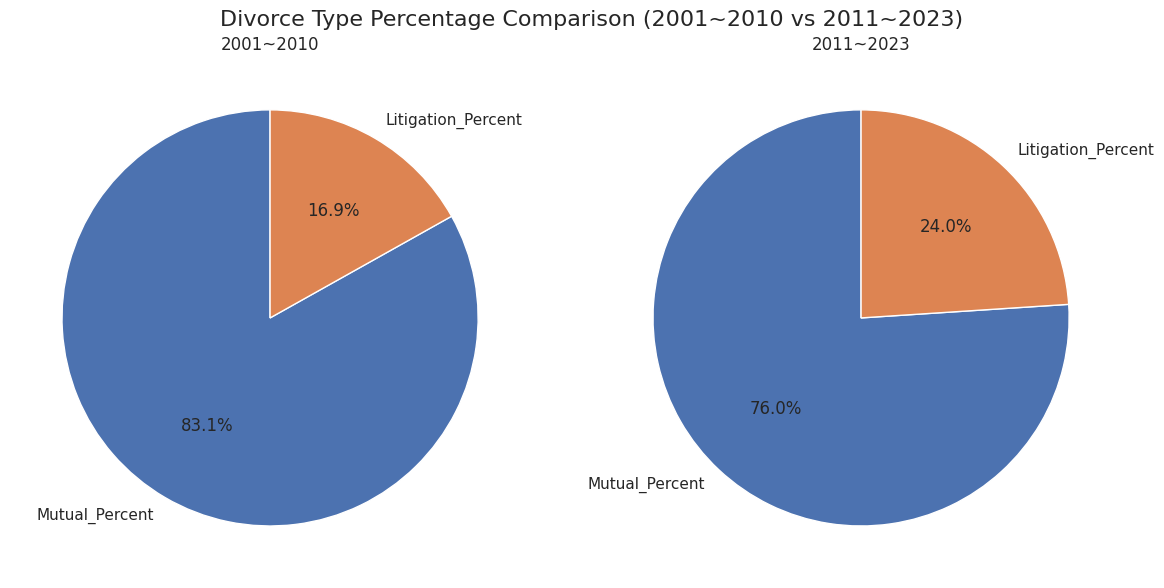

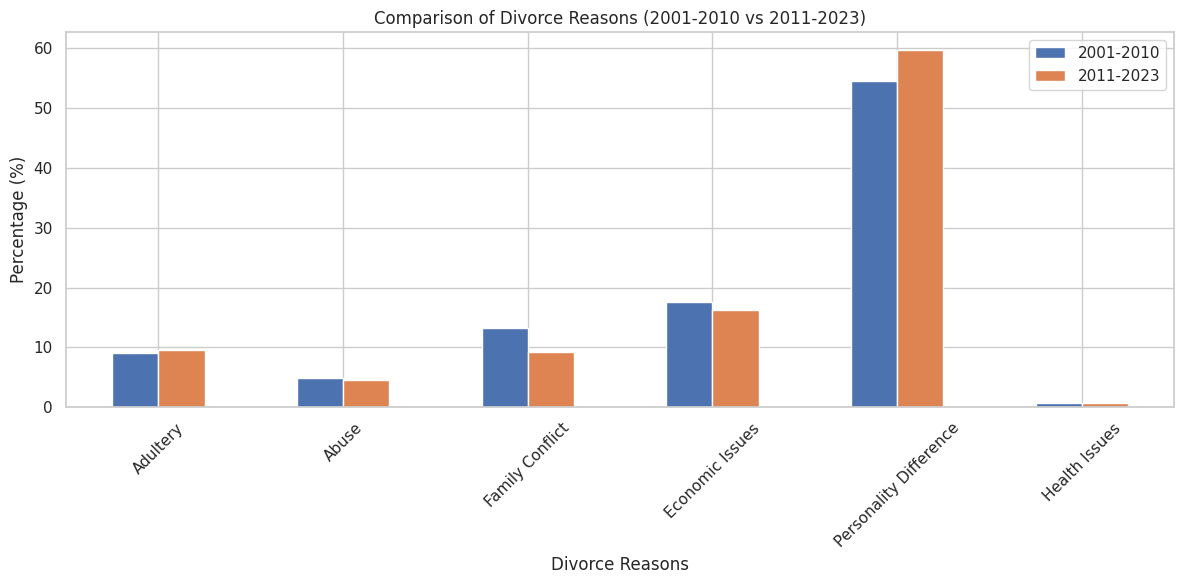

# **두 데이터를 비교했을 때**
**2000년도에는** IMF와 더불어 경제시장이 침체되고 하락하면서
협의 이혼의 비율이 더 높고,<br> 실제 이혼 사유에서도 배우자의 부정보다는 가정 내 불화 또는 금전적 이슈로 인한 <br> 이혼 건수가 더 많은 것을 확인할 수 있었습니다.

**2010년 이후에는** 경제의 성장 및 사회복지의 발전으로 인해 <br>
금전적인 이슈나 가정내 불화의 이유로는 이혼률이 하락하였으나,
개인의 다양한 가치관 변화 등 <br> 사회적 인식의 변화를 통해 배우자의 부정 등이 증가하면서 <br>재판 이혼률이 2000년대에 대비하여 상승한 것을 유추할 수 있었습니다.

# **아쉬운 점**
<br>
1. 사회 경제 성장률 데이터와, 혼인률, 사회복지의 퀄리티와 관련된 데이터도 함께 비교 분석하였으면<br> 조금 더 신뢰성 있는 데이터 분석이 되었을 것 같다는 아쉬움이 있었습니다.<br><br>
2. 2018~2023년의 사유별 데이터가 실제로 있었다면 조금 더 신빙성 있는 데이터 분석을 진행할 수 있었을 것 같습니다.